In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
sns.set()


GOAL : 
====
predict
* The task is to forecast the total amount of products sold in every shop for the test set.
* The test set. You need to forecast the sales for these shops and products for November 2015.

**Note** 
*  the list of shops and products slightly changes every month

submission :
=====
ID,item_cnt_month
0,0.5
1,0.5
2,0.5
3,0.5

In [2]:
DATA_FOLDER = '../data/'

In [3]:
transactions    = pd.read_csv(os.path.join(DATA_FOLDER, 'sales_train.csv.gz'))
items           = pd.read_csv(os.path.join(DATA_FOLDER, 'items.csv'))
item_categories = pd.read_csv(os.path.join(DATA_FOLDER, 'item_categories.csv'))
shops           = pd.read_csv(os.path.join(DATA_FOLDER, 'shops.csv'))

In [4]:
tests = pd.read_csv(os.path.join(DATA_FOLDER, 'test.csv.gz'))

# Data overview

In [5]:
transactions.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [6]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [7]:
item_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [9]:
tests.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [9]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


# EDA

In [13]:
trans_date = pd.to_datetime(transactions.date,format='%d.%m.%Y')

In [14]:
# transactions['date'] = transactions.date.map(lambda x:pd.to_datetime(x,format='%d.%m.%Y'))
transactions['date'] = trans_date
transactions.set_index('date',inplace=True)

In [15]:
transactions['amount_price'] = transactions.item_price * transactions.item_cnt_day
revenue_monthly_by_shop = pd.groupby(transactions, by=[transactions.index.year, 
                                                       transactions.index.month, 
                                                       transactions.shop_id])[['amount_price']].sum()

C:\Program Files\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: pd.groupby() is deprecated and will be removed Please use the Series.groupby() or DataFrame.groupby() methods
  after removing the cwd from sys.path.


In [16]:
revenue_monthly_by_shop.index.rename(['year','month','shop_id'],inplace=True)
revenue_monthly_by_shop.head()

amount_price
year month shop_id              
2013 1     0          2966412.00
           1          1527320.00
           2          1085064.80
           3           560585.01
           4          1433666.00

In [50]:
idx = pd.IndexSlice
monthly_revenue_shop234 = revenue_monthly_by_shop.loc[idx[:,:,range(10,20)],:]
monthly_revenue_shop234.head(10)

amount_price
year month shop_id              
2013 1     10          577494.00
           12          996495.75
           13          225435.00
           14         1264646.00
           15         2024127.00
           16         1999620.50
           18         2742707.00
           19         2118666.55
     2     10          636783.00
           12         1370670.70

In [51]:
monthly_revenue_shop234.reset_index(inplace=True)
monthly_revenue_shop234['date'] = pd.to_datetime(monthly_revenue_shop234.year*10000 + monthly_revenue_shop234.month*100 + 1, format='%Y%m%d')
monthly_revenue_shop234.head()

C:\Program Files\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,year,month,shop_id,amount_price,date
0,2013,1,10,577494.00,2013-01-01
1,2013,1,12,996495.75,2013-01-01
2,2013,1,13,225435.00,2013-01-01
3,2013,1,14,1264646.00,2013-01-01
4,2013,1,15,2024127.00,2013-01-01


In [52]:
monthly_revenue_shop234 = monthly_revenue_shop234[['shop_id','amount_price','date']].set_index('date')
monthly_revenue_shop234.head(10)

,shop_id,amount_price
date,,
2013-01-01,10,577494.00
2013-01-01,12,996495.75
2013-01-01,13,225435.00
2013-01-01,14,1264646.00
2013-01-01,15,2024127.00
2013-01-01,16,1999620.50
2013-01-01,18,2742707.00
2013-01-01,19,2118666.55
2013-02-01,10,636783.00


In [53]:
monthly_revenue_shop234.pivot(columns='shop_id',values='amount_price').head()

shop_id,10,11,12,13,14,15,16,17,18,19
date,,,,,,,,,,
2013-01-01,577494.0,NaN,996495.75,225435.0,1264646.0,2024127.0,1999620.5,NaN,2742707.0,2118666.55
2013-02-01,636783.0,NaN,1370670.70,226880.0,1270446.5,2011249.0,1737058.0,NaN,3066448.0,1859942.00
2013-03-01,596111.0,NaN,1893864.10,311521.0,1358005.0,1998164.6,1996357.0,NaN,3304036.7,1937416.00
2013-04-01,368563.0,NaN,1360277.45,240835.0,858036.0,1381703.0,1262198.0,NaN,2247598.0,1430535.00
2013-05-01,353021.0,NaN,1115095.60,225950.0,881561.0,1255709.0,1230459.0,NaN,2443014.0,1206345.00


In [54]:
import matplotlib.dates as mdates
## 

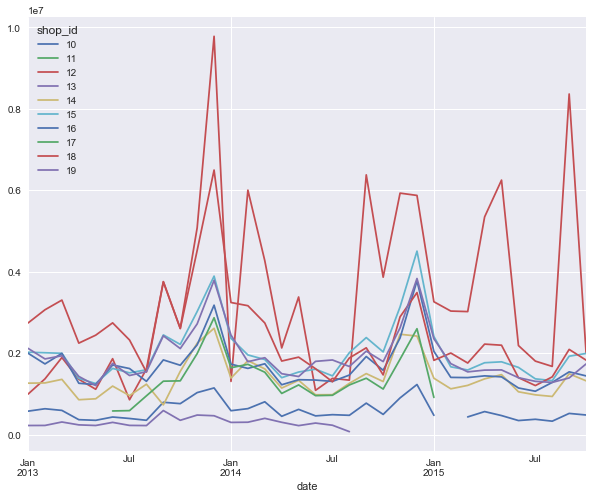

In [55]:
fig,ax = plt.subplots(figsize= (10,8))
## plot each shop monthly reveune
monthly_revenue_plot = monthly_revenue_shop234.pivot(columns='shop_id',values='amount_price')
monthly_revenue_plot.plot(ax=ax,grid=1)

# ax.plot_date(monthly_revenue_plot.axes[0].to_pydatetime(), monthly_revenue_plot, '-')
# ax.xaxis.set_minor_locator(dates.MonthLocator(bymonth=1))
#set ticks every month
#set major ticks format


**FINDING:** 
1. seems there exist peaks periodically at **DEC** and **SEP** , **March**(slightly)
2. some of store would shut down ? (`shop_id=0,1,8`)

___


Q: Hottest items in each shop

In [24]:
## total items
len(items.item_id.unique())

22170

In [25]:
transactions.date_block_num.unique() ## monthly 

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33], dtype=int64)

In [26]:
transactions.head()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,amount_price
date,,,,,,
2013-01-02,0,59,22154,999.00,1.0,999.00
2013-01-03,0,25,2552,899.00,1.0,899.00
2013-01-05,0,25,2552,899.00,-1.0,-899.00
2013-01-06,0,25,2554,1709.05,1.0,1709.05
2013-01-15,0,25,2555,1099.00,1.0,1099.00


In [27]:
item_cnt_monthly_shop = transactions.groupby(['shop_id','date_block_num','item_id',])['item_cnt_day'].sum()

In [28]:
item_cnt_monthly_shop.rename('sold_cnt',inplace=True)
# item_cnt_monthly_shop.reset_index(inplace=True)

shop_id  date_block_num  item_id
0        0               32          6.0
                         33          3.0
                         35          1.0
                         43          1.0
                         51          2.0
                         61          1.0
                         75          1.0
                         88          1.0
                         95          1.0
                         96          1.0
                         98         25.0
                         111         1.0
                         149         3.0
                         151         1.0
                         153         1.0
                         198         1.0
                         210         2.0
                         282         1.0
                         306         1.0
                         351         1.0
                         421         1.0
                         438         1.0
                         482         2.0
                        

In [ ]:
# item_cnt_monthly_shop_df.groupby(['shop_id','date_block_num'])['item_id','sold_cnt'].agg({'sold_cnt':min}).reset_index()

In [30]:
item_cnt_monthly_shop_df = item_cnt_monthly_shop.reset_index()
top_sells_monthly_shop_df = item_cnt_monthly_shop_df.groupby(['shop_id','date_block_num']).max().reset_index()
# top_sells_monthly_shop_df.head()

In [31]:
item_cnt_monthly_shop_df.head()

,shop_id,date_block_num,item_id,sold_cnt
0,0,0,32,6.0
1,0,0,33,3.0
2,0,0,35,1.0
3,0,0,43,1.0
4,0,0,51,2.0


In [32]:
top_sells_monthly_shop_df = top_sells_monthly_shop_df.merge(items,on='item_id')
top_sells_monthly_shop_df = top_sells_monthly_shop_df.merge(item_categories, on ='item_category_id')

In [33]:
top_sells_monthly_shop_df.head()

,shop_id,date_block_num,item_id,sold_cnt,item_name,item_category_id,item_category_name
0,0,0,22160,39.0,ЯРМАРКА ТЩЕСЛАВИЯ (Регион),40,Кино - DVD
1,0,1,22160,67.0,ЯРМАРКА ТЩЕСЛАВИЯ (Регион),40,Кино - DVD
2,6,0,22160,45.0,ЯРМАРКА ТЩЕСЛАВИЯ (Регион),40,Кино - DVD
3,6,8,22160,269.0,ЯРМАРКА ТЩЕСЛАВИЯ (Регион),40,Кино - DVD
4,7,0,22160,31.0,ЯРМАРКА ТЩЕСЛАВИЯ (Регион),40,Кино - DVD


In [34]:
top_sells_monthly_shop_df[top_sells_monthly_shop_df.shop_id == 7].sort_values('date_block_num')

,shop_id,date_block_num,item_id,sold_cnt,item_name,item_category_id,item_category_name
4,7,0,22160,31.0,ЯРМАРКА ТЩЕСЛАВИЯ (Регион),40,Кино - DVD
49,7,1,22151,31.0,ЯВЛЕНИЕ (2012),40,Кино - DVD
290,7,2,22147,75.0,Я-ЛЕГЕНДА WB (регион),40,Кино - DVD
333,7,3,22136,15.0,"Я, АЛЕКС КРОСС (регион)",40,Кино - DVD
249,7,4,22152,50.0,ЯВЛЕНИЕ (2012) (регион),40,Кино - DVD
927,7,5,22079,100.0,"Эврика [PC, Jewel]",30,Игры PC - Стандартные издания
732,7,6,22150,109.0,Я-ЧЕТВЕРТЫЙ (BD),37,Кино - Blu-Ray
713,7,7,22122,108.0,Я ОЧЕНЬ ВОЗБУЖДЕН (BD),37,Кино - Blu-Ray
334,7,8,22136,156.0,"Я, АЛЕКС КРОСС (регион)",40,Кино - DVD
291,7,9,22147,112.0,Я-ЛЕГЕНДА WB (регион),40,Кино - DVD


hottest item_category?

In [35]:
item_cnt_monthly_shop_df = item_cnt_monthly_shop_df.merge(items,on='item_id')
item_cnt_monthly_shop_df = item_cnt_monthly_shop_df.merge(item_categories,on='item_category_id')


In [36]:
item_cnt_monthly_shop_df.head(3)

,shop_id,date_block_num,item_id,sold_cnt,item_name,item_category_id,item_category_name
0,0,0,32,6.0,1+1,40,Кино - DVD
1,0,1,32,10.0,1+1,40,Кино - DVD
2,1,0,32,7.0,1+1,40,Кино - DVD


In [86]:
cat_monthly_shop_df = item_cnt_monthly_shop_df.groupby(['shop_id','date_block_num','item_category_name']).agg({'sold_cnt':sum})
cat_monthly_shop_df.head()

sold_cnt
shop_id date_block_num item_category_name             
0       0              Аксессуары - PS3           53.0
                       Аксессуары - PS4           28.0
                       Аксессуары - PSP           16.0
                       Аксессуары - PSVita        28.0
                       Аксессуары - XBOX 360      65.0

In [87]:
g = cat_monthly_shop_df.groupby(level=[0,1],group_keys=None)
# g.apply(lambda x:x.order(ascending=False).head(3))

In [88]:
top_sells_category_monthly_shop = g.apply(lambda x:x.sold_cnt.sort_values(ascending=False).head(5)).reset_index()
top_sells_category_monthly_shop.head(5)

,shop_id,date_block_num,item_category_name,sold_cnt
0,0,0,Кино - DVD,1838.0
1,0,0,Игры PC - Стандартные издания,761.0
2,0,0,Музыка - CD локального производства,426.0
3,0,0,Игры - PS3,345.0
4,0,0,Кино - Blu-Ray,302.0


In [89]:
cond = top_sells_category_monthly_shop.date_block_num== 23
top_sells_category_monthly_shop[(top_sells_category_monthly_shop['shop_id']==6) & cond] 

,shop_id,date_block_num,item_category_name,sold_cnt
810,6,23,Музыка - CD локального производства,508.0
811,6,23,Кино - DVD,383.0
812,6,23,Игры PC - Стандартные издания,291.0
813,6,23,Игры - PS4,255.0
814,6,23,Кино - Blu-Ray,237.0


In [90]:
shopid = 10
mask = (top_sells_category_monthly_shop['shop_id']== shopid)
top3_cat_shop = top_sells_category_monthly_shop[['date_block_num','item_category_name','sold_cnt']][mask]

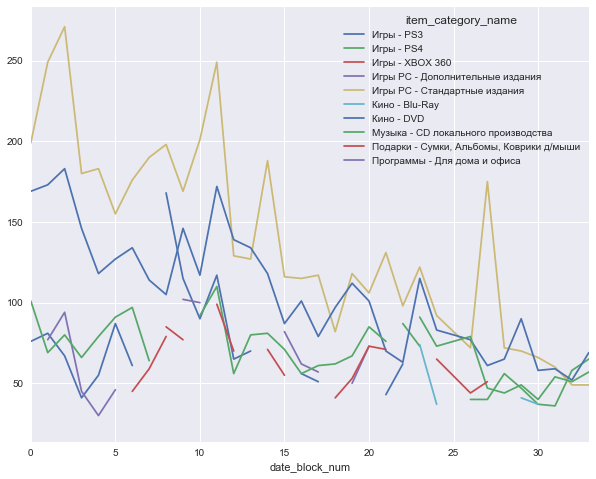

In [91]:
top3_cat_shop.pivot(index='date_block_num',columns='item_category_name',values='sold_cnt').plot(figsize= (10,8))

**finding**
1. top sell category: 
    - pcgame
    - dvd movie 
    - music
2. top sells amount drop but revenue didn't drop a lot **WHY**
    - guess : some higher price item cover that revenue drop ?? WHAT IS IT??

Q: WHAT **item_category keep growing** to cover the sell amount drop of pcgame, dvd movie...

In [73]:
trans_with_cat = transactions.merge(items,on='item_id')
trans_with_cat = trans_with_cat.merge(item_categories,on='item_category_id')
trans_with_cat.head()
# .groupby(['date_block_num','shop_id',])

,date_block_num,shop_id,item_id,item_price,item_cnt_day,amount_price,item_name,item_category_id,item_category_name
0,0,59,22154,999.0,1.0,999.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
1,0,24,22154,999.0,1.0,999.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
2,0,27,22154,999.0,1.0,999.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
3,0,25,22154,999.0,1.0,999.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
4,0,25,22154,999.0,1.0,999.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray


In [157]:
monthly_revenue_by_shop_cat = trans_with_cat.groupby(['shop_id','date_block_num','item_category_id','item_category_name'])['amount_price'].sum()

In [159]:
g = monthly_revenue_by_shop_cat.groupby(level=[0,1],group_keys=None)
top3cat_monthly_revenue = g.apply(lambda x:x.sort_values(ascending=False).head(3))


In [185]:
top3cat_monthly_revenue_df = pd.DataFrame(top3cat_monthly_revenue)
shopid = 5 
idx = pd.IndexSlice
top3cat_revenue = top3cat_monthly_revenue_df.loc[idx[shopid,:],:]

# [idx[:,:,range(10,20)],:]

In [171]:
# top3cat_revenue.reset_index(inplace=True)

In [186]:
top3cat_revenue.head()

amount_price
shop_id date_block_num item_category_id item_category_name                         
5       1              19               Игры - PS3                         92843.00
                       30               Игры PC - Стандартные издания      91763.45
                       40               Кино - DVD                         65511.00
        2              30               Игры PC - Стандартные издания     164452.08
                       19               Игры - PS3                        134233.00

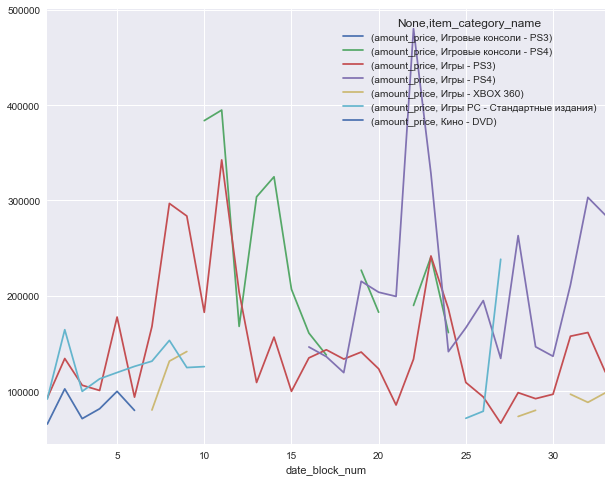

In [208]:
top3cat_revenue.reset_index(level=[0,-2],drop=True).reset_index(level=1).pivot(columns='item_category_name').plot(figsize=(10,8))

**finding:** 
1. seems  ps4,XBOX360 cover drop of DVD revenue